# Visualizing Earnings Based on College Majors

## Introduction
In this project we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/) which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset corresponds to a different major in college and contains information on employment rates, gender diversity, median salaries and etc. Some columns in the dataset are shown below:

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of a full-time class.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

Using visualizations, we can begin to explore questions from the dataset such as:

* Do students in more popular majors make more money? (Using scatter plots)
* What's the most common median salary? (Using histograms)
* Which category of majors have the most students? (Using bar plots)

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's first import the libraries we need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now lets read in the dataset into a DataFrame and begin exploring the data.

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
# use df.iloc[] to return the first row formatted as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

Let's look at the first few rows of the dataset.

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Now lets look at the last few rows of the dataset.

In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


Next we will generate summary statistics for all of the numeric columns.

In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Let's get a little bit more information about the dataset.

In [6]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

As can be seen from above that there are 173 rows in this dataset. It is also noticeable that few columns have a missing value. Another way to determine the shape of a dataset is by using df.shape as shown below.

In [7]:
recent_grads.shape

(173, 21)

In [8]:
# Store the number of rows in the variable raw_data_count
raw_data_count = 173
# Use df.dropna() to drop rows containing missing values and assign the resulting Dataframe back to recent_grads.
recent_grads = recent_grads.dropna()

Let's now check the number of rows in recent_grad and assign the value to cleaned_data_count.

In [9]:
cleaned_data_count = recent_grads.shape[0]

Comparing cleaned_data_count and raw_data_count shows that only one row contained missing values and hence was dropped.

In [10]:
print('The number of rows in raw_data_count: {}'.format(raw_data_count))
print('The number of rows in cleaned_data_count: {}'.format(cleaned_data_count))

The number of rows in raw_data_count: 173
The number of rows in cleaned_data_count: 172


## Pandas, Scatter Plots

To try to answer the question of whether students in more popular majors make more money, we will dig deeper into the data at hand, before visualizing it.

First it is worth understanding the variables (columns) we are dealing with here. Sample_size represents a sample or example of how many students to expect in a class for that given major. It is to be expected then that the bigger the sample size, the more popular the class is. To test this we will quickly compare the sample size with the total number of graduates with a given major (another way that the popularity of a major could be determined).

First we sort our dataset by the Total variable and see what kind of sample sizes we get for the majors with the highest and lowest values for the Total variable.

In [11]:
df_sorted = recent_grads.sort_values(by='Total',ascending=False)
df_sorted.head(15)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.601858,1370,182295,...,72371,100336,13874,0.070725,33400,24000,45000,88232,81109,28339
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,...,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
93,94,1901,COMMUNICATIONS,213996.0,70619.0,143377.0,Communications & Journalism,0.669999,2394,179633,...,49889,116251,14602,0.075177,35000,27000,45000,40763,97964,27440
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
77,78,6206,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.615727,2684,178862,...,35829,127230,11663,0.061215,38000,30000,50000,25320,93889,27968
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886
137,138,3301,ENGLISH LANGUAGE AND LITERATURE,194673.0,58227.0,136446.0,Humanities & Liberal Arts,0.700898,1436,149180,...,57825,81180,14345,0.087724,32000,23000,41000,57690,71827,26503
78,79,5506,POLITICAL SCIENCE AND GOVERNMENT,182621.0,93880.0,88741.0,Social Science,0.485930,1387,133454,...,43711,83236,15022,0.101175,38000,28000,50000,36854,66947,19803


In [12]:
df_sorted.tail(15)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
161,162,1199,MISCELLANEOUS AGRICULTURE,1488.0,404.0,1084.0,Agriculture & Natural Resources,0.728495,24,1290,...,335,936,82,0.059767,29000,23000,42100,483,626,31
72,73,5000,PHYSICAL SCIENCES,1436.0,894.0,542.0,Physical Sciences,0.377437,10,1146,...,437,653,42,0.035354,40000,30000,55000,530,465,269
91,92,5206,SOCIAL PSYCHOLOGY,1386.0,413.0,973.0,Psychology & Social Work,0.702020,8,1080,...,433,529,33,0.029650,36000,34000,45000,434,593,37
83,84,3602,BOTANY,1329.0,626.0,703.0,Biology & Life Science,0.528969,9,1010,...,169,740,0,0.000000,37000,26000,40000,677,184,56
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
19,20,3201,COURT REPORTING,1148.0,877.0,271.0,Law & Public Policy,0.236063,14,930,...,223,808,11,0.011690,54000,50000,54000,402,528,144
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
55,56,2303,SCHOOL STUDENT COUNSELING,818.0,119.0,699.0,Education,0.854523,4,730,...,135,545,88,0.107579,41000,41000,43000,509,221,0
120,121,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,280.0,524.0,Education,0.651741,5,703,...,0,504,0,0.000000,34000,29000,35000,346,206,111


The relationship is as expected, with the majors containing a higher number of total graduates also having a larger sample size per class such as Psychology and Communications.

Meanwhile, majors containing a lower number of total graduates such as Metallurgical Engineering and Mining and Mineral Engineering also have a smaller sample size per class.

A more efficient way, however, to have explored this relationship might have been to just plot the variables against each other. We will now generate a scatter plot to further examine this relationship.

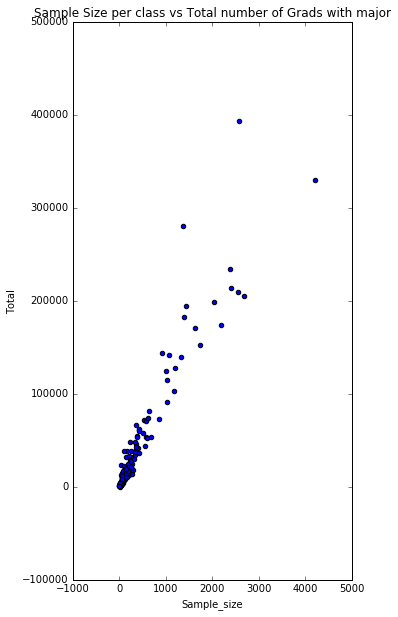

In [13]:
recent_grads.plot(x='Sample_size',y='Total',kind='scatter',
                 title='Sample Size per class vs Total number of Grads with major',
                 figsize=(5,10))

As can be seen above, there is clearly a positive correlation between the sample size per class and the total number of graduates with the major. Hence we have 2 reasonable and alternative ways to measure the popularity of a major.

We will now generate scatter plots to explore the following relationships:
* Sample_size and Median
* ShareWomen and Median
* ShareWomen and Unemployment_rate
* Men and Median
* Women and Median

We shall use these plots to identify patterns in the dataset and to explore questions such as:

* Do students in more popular majors make more money?
* Does the gender ratio of a major affect the earnings of those students?

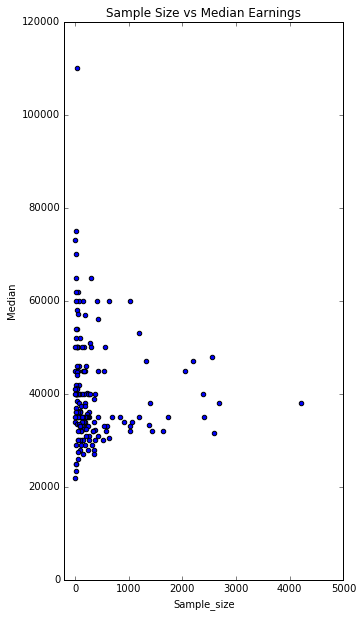

In [14]:
recent_grads.plot(x='Sample_size',y='Median', kind='scatter',
                  title='Sample Size vs Median Earnings',figsize=(5,10),
                 xlim=(-200,5000))

It can be determined from above that majors with larger sample sizes tend to produce graduates with a low median salary. 

On the other hand, while majors with smaller sample sizes tend to produce graduates with a wider range of median salaries, crucially they also produce graduates with the highest salaries.

Therefore, it can be inferred that students in more popular majors such as Psychology and Communications make less money than those in less popular majors such as Metallurgical Engineering and Mining and Mineral Engineering.

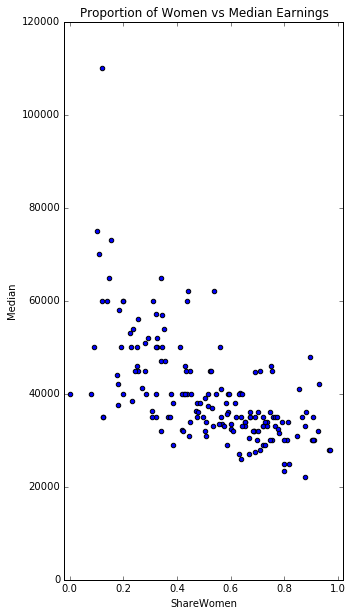

In [15]:
recent_grads.plot(x='ShareWomen',y='Median',kind='scatter',
                 title='Proportion of Women vs Median Earnings',
                 figsize=(5,10),xlim=(-0.02,1.02))

When comparing the proportion of women for a major to the median earnings of full-time graduates of that major it appears that the majors with a higher proportion of women tend to generate a lower salary.

This is illustrated above where it can be deduced that there seems to be a negative relationship between the proportion of women on a given major and the median earnings of graduates.

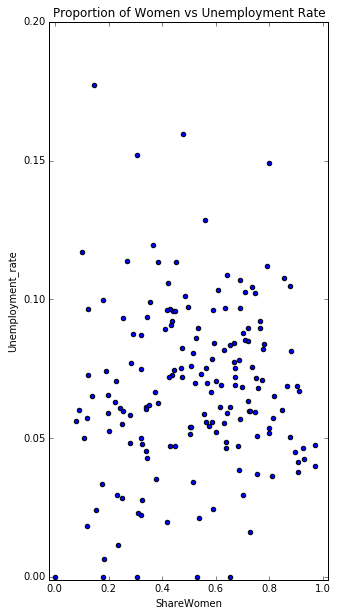

In [16]:
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter',
                 title='Proportion of Women vs Unemployment Rate',
                 figsize=(5,10),xlim=(-0.02,1.02),ylim=(-0.001,0.2))

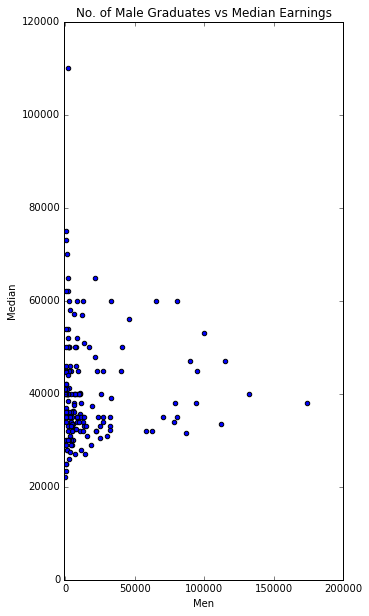

In [17]:
recent_grads.plot(x='Men',y='Median',kind='scatter',
                  title='No. of Male Graduates vs Median Earnings',
                 figsize=(5,10),xlim=(-500,200000))

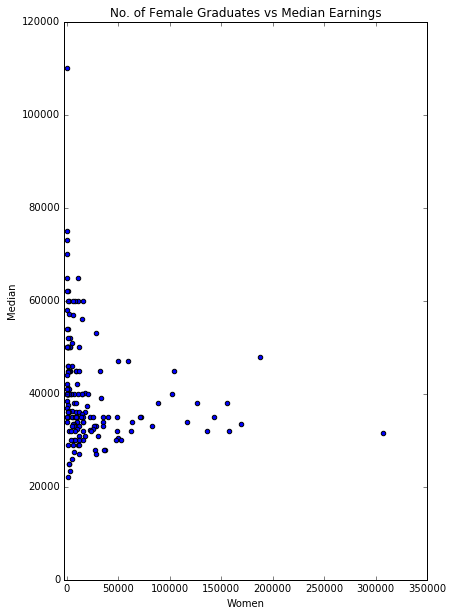

In [18]:
recent_grads.plot(x='Women',y='Median',kind='scatter',
                 title='No. of Female Graduates vs Median Earnings',
                 figsize=(6.5,10),xlim=(-2000,350000))

# Pandas, Histograms

We will now generate histograms to explore the distributions of the following columns:
* Sample_size
* Median
* ShareWomen
* Unemployment_rate

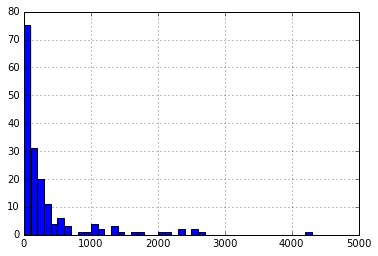

In [19]:
recent_grads['Sample_size'].hist(bins=50, range=(0,5000))

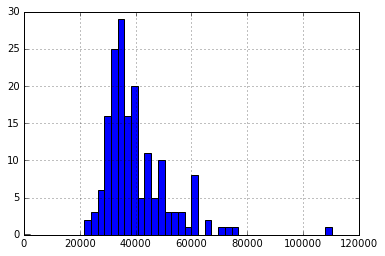

In [20]:
recent_grads['Median'].hist(bins=50, range=(0,120000))

From the figure above, it can be determined that the most common salaries per major fall into the \$30,000 to $40,000 range.

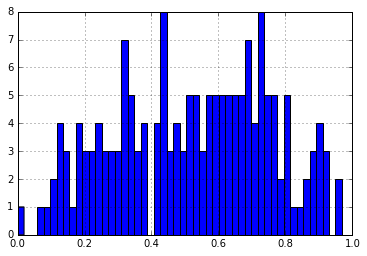

In [21]:
recent_grads['ShareWomen'].hist(bins=50)

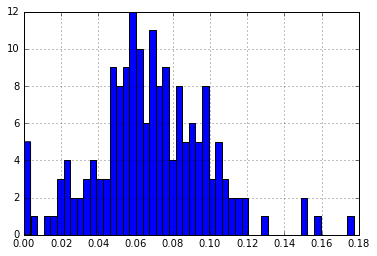

In [22]:
recent_grads['Unemployment_rate'].hist(bins=50)

## Pandas, Scatter Matrix Plot
In the last 2 steps, we created individual scatter plots to visualize potential relationships between variables and histograms to visualize the distributions of individual variables. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions concurrently. A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the diagonal (moving from top left to bottom right) are histograms, and the non-diagonal plots are scatter plots.

First we will create a 2 by 2 scatter matrix plot using the Sample_size and Median variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7aa09fc550>,
      dtype=object)

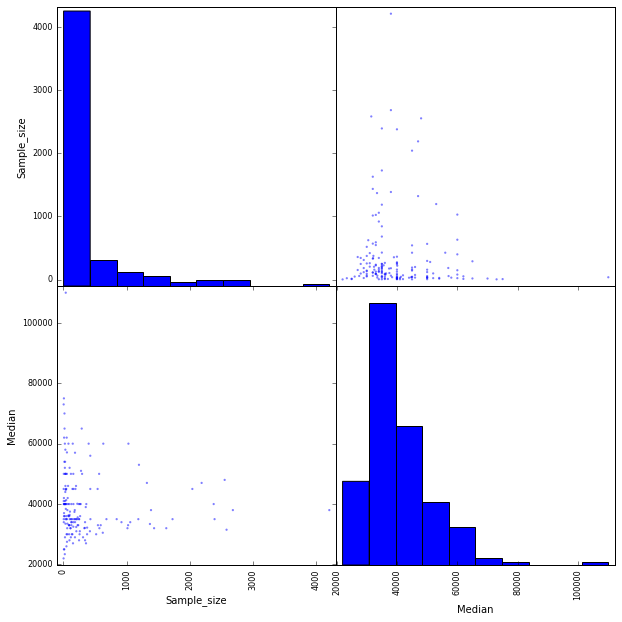

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size','Median']],
               figsize=(10,10))

Next we will create a 3 by 3 scatter matrix plot using the Sample_size, Median and Unemployment_rate variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7aa07ad588>,
      dtype=object)

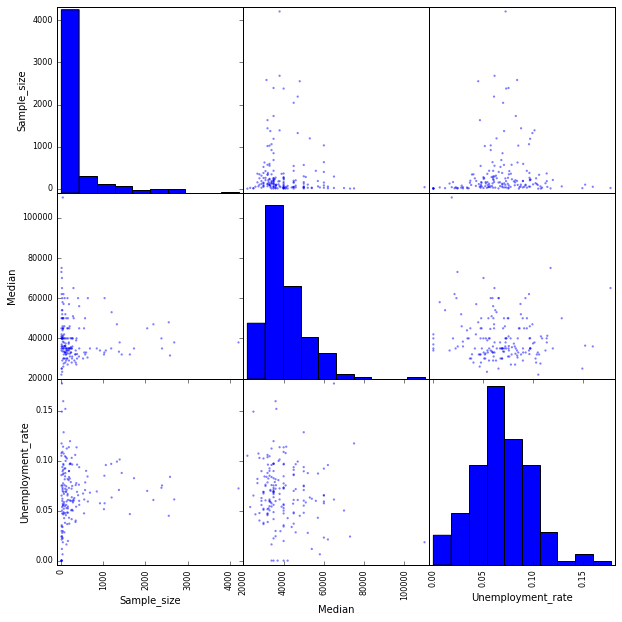

In [24]:
scatter_matrix(recent_grads[['Sample_size','Median',
                             'Unemployment_rate']],figsize=(10,10))

## Pandas, Bar Plots
Let's now use bar plots to compare the percentages of women (ShareWomen) per major from the first ten rows and last ten rows of the recent_grads dataframe.

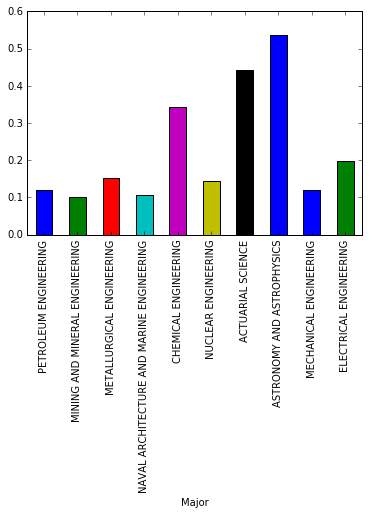

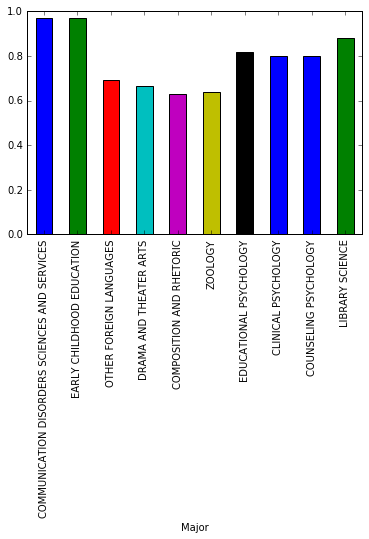

In [32]:
recent_grads[:10].plot.bar(x='Major',y='ShareWomen',legend=False)
recent_grads[-10:].plot.bar(x='Major',y='ShareWomen',legend=False)

The bar plots above illustrate to us that the 10 lowest-paying majors are predominantly taken by women, while the 10 highest-paying jobs are predominantly taken by men.

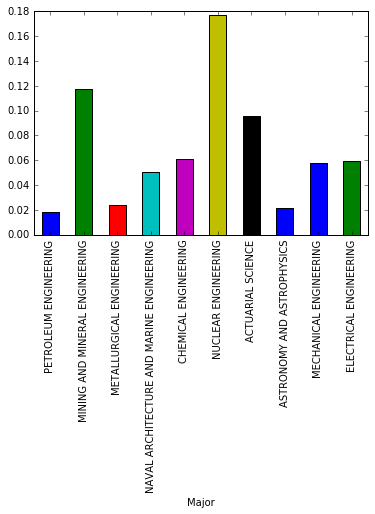

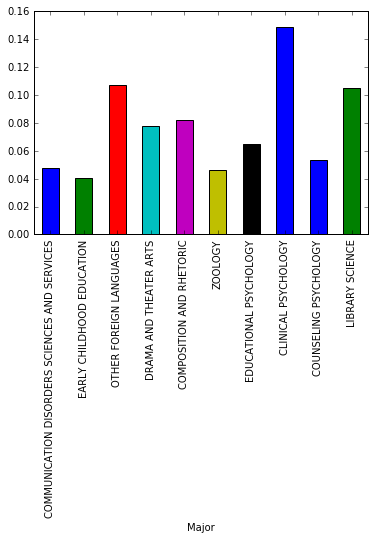

In [33]:
recent_grads[:10].plot.bar(x='Major',y='Unemployment_rate',legend=False)
recent_grads[-10:].plot.bar(x='Major',y='Unemployment_rate',legend=False)

On average, it seems as if the unemployment rate is higher for the bottom 10 paying jobs than the top 10 paying jobs.